In [7]:
# This is my solution to houses price solutions

In [8]:
import pandas as pd
import numpy as np 


In [9]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
#df_train['train']=1
#df_test['train']=0
#dftt=pd.concat([df_train, df_test], sort= False)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
df_train.isnull().sum().sort_values(ascending=False)[0:25]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

In [12]:
df_train.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [13]:
df_train.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [14]:
dropcol=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu']

In [15]:
dropcol

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [16]:
df_train.drop(dropcol , axis=1, inplace= True )

In [17]:
df_test.isna().sum().sort_values(ascending=False)[0:10]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
dtype: int64

In [18]:
df_test.drop(dropcol, axis=1, inplace=True)

In [19]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [20]:
SalesPrice=df_train.SalePrice

In [21]:
df_train.shape

(1460, 76)

In [22]:
df_test.shape

(1459, 75)

In [23]:
df_train.drop('SalePrice', axis=1 , inplace= True)

In [24]:
df_train.isna().sum().sort_values(ascending=False)[0:15]

LotFrontage     259
GarageCond       81
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
YearBuilt         0
dtype: int64

In [25]:
df_train.dtypes.sort_values()

Id                int64
BsmtUnfSF         int64
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
                  ...  
RoofStyle        object
HouseStyle       object
ExterCond        object
HeatingQC        object
SaleCondition    object
Length: 75, dtype: object

# Filling missing data

In [248]:
from sklearn.impute import SimpleImputer
float_imputer=SimpleImputer(missing_values= np.nan , strategy= 'mean')
cat_imputer=SimpleImputer(missing_values= np.nan , strategy= 'most_frequent')

In [249]:
var1 = ['GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']
df_train[var1] = cat_imputer.fit_transform(df_train[var1])

In [250]:
df_train[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']] = float_imputer.fit_transform(df_train[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']])

In [251]:
df_train.isna().sum().sort_values() # there is no missing value

Id               0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
                ..
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearBuilt        0
SaleCondition    0
Length: 75, dtype: int64

In [252]:
# filling nan values for float dtype features
float_missing = ['LotFrontage','GarageCars','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','MasVnrArea','GarageArea','GarageYrBlt']
test_float_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_test[float_missing] = test_float_imputer.fit_transform(df_test[float_missing])
# filling nan values for str dtype features
str_missing = ['BsmtFinType2','GarageCond','GarageQual','Exterior1st','Exterior2nd','GarageFinish','SaleType','GarageType','BsmtCond','Functional','Utilities','BsmtQual','KitchenQual','BsmtExposure','MasVnrType','BsmtFinType1','MSZoning']
test_str_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_test[str_missing] = test_str_imputer.fit_transform(df_test[str_missing])

In [253]:
df_test.isna().sum().sort_values(ascending=False)

SaleCondition    0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Id               0
Length: 75, dtype: int64

In [254]:
# All the missing data are handled 
# we need to encode categorical data

In [255]:
import seaborn as sns
import matplotlib as plt

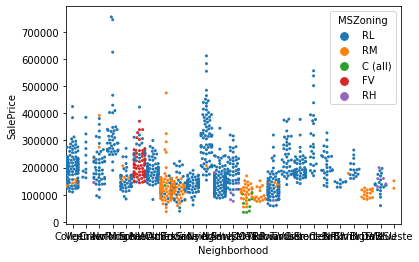

In [256]:
sns.swarmplot(df_train['Neighborhood'], SalesPrice, hue=df_train['MSZoning'], size= 3)


In [257]:
df_train['train']=1
df_test['train']=0

In [258]:
dftt

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,BldgType,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,0,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,0,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,0,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,1,3,3,0,0,3,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,1,3,3,0,0,4,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,1,3,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [259]:
df_train.nunique().sort_values(ascending=False)

Id            1460
LotArea       1073
GrLivArea      861
BsmtUnfSF      780
1stFlrSF       753
              ... 
HalfBath         3
Utilities        2
Street           2
CentralAir       2
train            1
Length: 76, dtype: int64

In [260]:
ordinal_columns = ['Street','LotShape','LandContour','Utilities','LandSlope','BldgType','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond',
                   'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond',
                   'PavedDrive']

In [261]:
df_train[ordinal_columns].nunique()

Street          2
LotShape        4
LandContour     4
Utilities       2
LandSlope       3
BldgType        5
HouseStyle      8
ExterQual       4
ExterCond       5
BsmtQual        4
BsmtCond        4
BsmtExposure    4
BsmtFinType1    6
BsmtFinType2    6
HeatingQC       5
CentralAir      2
KitchenQual     4
Functional      7
GarageFinish    3
GarageQual      5
GarageCond      5
PavedDrive      3
dtype: int64

In [262]:
from sklearn.preprocessing import LabelEncoder

In [263]:
train_le={}
for col in ordinal_columns:
    train_le[col]=LabelEncoder()
    df_train[col]=train_le[col].fit_transform(df_train[col])
    
test_le = {}
for col in ordinal_columns:
    test_le[col] = LabelEncoder()
    
    df_test[col] = test_le[col].fit_transform(df_test[col])
    
    

In [264]:
df_train[ordinal_columns]


,Street,LotShape,LandContour,Utilities,LandSlope,BldgType,HouseStyle,ExterQual,ExterCond,BsmtQual,...,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive
0,1,3,3,0,0,0,5,2,4,2,...,2,5,0,1,2,6,1,4,4,2
1,1,3,3,0,0,0,2,3,4,2,...,0,5,0,1,3,6,1,4,4,2
2,1,0,3,0,0,0,5,2,4,2,...,2,5,0,1,2,6,1,4,4,2
3,1,0,3,0,0,0,5,3,4,3,...,0,5,2,1,2,6,2,4,4,2
4,1,0,3,0,0,0,5,2,4,2,...,2,5,0,1,2,6,1,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,3,3,0,0,0,5,3,4,2,...,5,5,0,1,3,6,1,4,4,2
1456,1,3,3,0,0,0,2,3,4,2,...,0,4,4,1,3,2,2,4,4,2
1457,1,3,3,0,0,0,5,0,2,3,...,2,5,0,1,2,6,1,4,4,2
1458,1,3,3,0,0,0,2,3,4,3,...,2,4,2,1,2,6,2,4,4,2


In [265]:
df_test[ordinal_columns]

,Street,LotShape,LandContour,Utilities,LandSlope,BldgType,HouseStyle,ExterQual,ExterCond,BsmtQual,...,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive
0,1,3,3,0,0,0,2,3,4,3,...,4,3,4,1,3,6,2,3,4,2
1,1,0,3,0,0,0,2,3,4,3,...,0,5,4,1,2,6,2,3,4,2
2,1,0,3,0,0,0,4,3,4,2,...,2,5,2,1,3,6,0,3,4,2
3,1,0,3,0,0,0,4,3,4,3,...,2,5,0,1,2,6,0,3,4,2
4,1,0,1,0,0,4,2,2,4,2,...,0,5,0,1,2,6,1,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,3,3,0,0,3,4,3,4,3,...,5,5,2,1,3,6,2,3,4,2
1455,1,3,3,0,0,4,4,3,4,3,...,4,5,4,1,3,6,2,3,4,2
1456,1,3,3,0,0,0,2,3,4,3,...,0,5,0,1,3,6,2,3,4,2
1457,1,3,3,0,0,0,5,3,4,2,...,2,5,4,1,3,6,2,3,4,2


In [266]:
df_train['train']=1
df_test['train']=0
dftt=pd.concat([df_train,df_test])

In [267]:
dftt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,train
0,1,60,RL,65.0,8450,1,3,3,0,Inside,...,0,0,0,0,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,1,3,3,0,FR2,...,0,0,0,0,0,5,2007,WD,Normal,1
2,3,60,RL,68.0,11250,1,0,3,0,Inside,...,0,0,0,0,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,1,0,3,0,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,1
4,5,60,RL,84.0,14260,1,0,3,0,FR2,...,0,0,0,0,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,1,3,3,0,Inside,...,0,0,0,0,0,6,2006,WD,Normal,0
1455,2916,160,RM,21.0,1894,1,3,3,0,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,0
1456,2917,20,RL,160.0,20000,1,3,3,0,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,0
1457,2918,85,RL,62.0,10441,1,3,3,0,Inside,...,0,0,0,0,700,7,2006,WD,Normal,0


In [268]:
dftt = pd.get_dummies(dftt)

In [269]:
dftt

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,BldgType,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,0,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,0,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,0,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,1,3,3,0,0,3,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,1,3,3,0,0,4,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,1,3,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [172]:
df_train=dftt[dftt['train']==1]
df_test=dftt[dftt['train']==0]

In [173]:
df_train

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,BldgType,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,0,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,0,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,0,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [181]:
from sklearn.model_selection import train_test_split


In [182]:
x_train,x_test,y_train,y_test= train_test_split(df_train, SalesPrice)

# Random Forest Model

In [191]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators= 500)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [192]:
y_pred = rf.predict(x_test)

In [193]:
# helper function to evaluate different scores
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
def get_score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    rmsle = mean_squared_log_error(y_test, y_pred) 
    return (r2, mse, rmse, rmsle)


In [194]:
get_score(y_test, y_pred)

(0.862334560828275, 866240002.1521689, 866240002.1521689, 0.0202331011861839)

# Extra Tree

In [196]:
from sklearn.ensemble import ExtraTreesRegressor
ex=ExtraTreesRegressor(n_estimators=500 , random_state= 1)

In [197]:
ex.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
                    oob_score=False, random_state=1, verbose=0,
                    warm_start=False)

In [203]:
y_pred = ex.predict(x_test)

In [204]:
get_score(y_pred, y_test)

(0.864817691653538, 718513385.9446176, 718513385.9446176, 0.018664920741015306)

In [205]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=500, random_state=500)

In [206]:
gbr.fit(x_train, y_train)
y_pred=gbr.predict(x_test)
get_score(y_test, y_pred)

(0.9032110593608146,
 609030506.5093962,
 609030506.5093962,
 0.017949008233365846)

In [ ]:
#sub_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': pred})
#sub_df.to_csv('submit2.csv', index=False)